In [10]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt



In [2]:
# Load California housing dataset
california_housing = fetch_california_housing()
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
y = pd.Series(california_housing.target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [3]:
# Linear Regression
linear_reg_model = LinearRegression()
linear_reg_model.fit(X_train_scaled, y_train)
linear_reg_predictions = linear_reg_model.predict(X_test_scaled)




In [14]:
# Artificial Neural Network (ANN)
ann_model = MLPRegressor(hidden_layer_sizes=(50, 50), max_iter=500, random_state=42)
ann_model.fit(X_train_scaled, y_train)
ann_predictions = ann_model.predict(X_test_scaled)


In [15]:
# Compare model performances
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
ann_mse = mean_squared_error(y_test, ann_predictions)

print(f"Linear Regression Mean Squared Error: {linear_reg_mse}")
print(f"ANN Mean Squared Error: {ann_mse}")

Linear Regression Mean Squared Error: 0.5558915986952442
ANN Mean Squared Error: 0.27730979205751005


In [16]:
linear_reg_r2 = r2_score(y_test, linear_reg_predictions)
ann_r2 = r2_score(y_test, ann_predictions)

print(f"Linear Reg R-squared (R2) Score: {linear_reg_r2}")
print(f" ANN R-squared (R2) Score: {ann_r2}")

R-squared (R2) Score: 0.575787706032451
R-squared (R2) Score: 0.7883792032394557


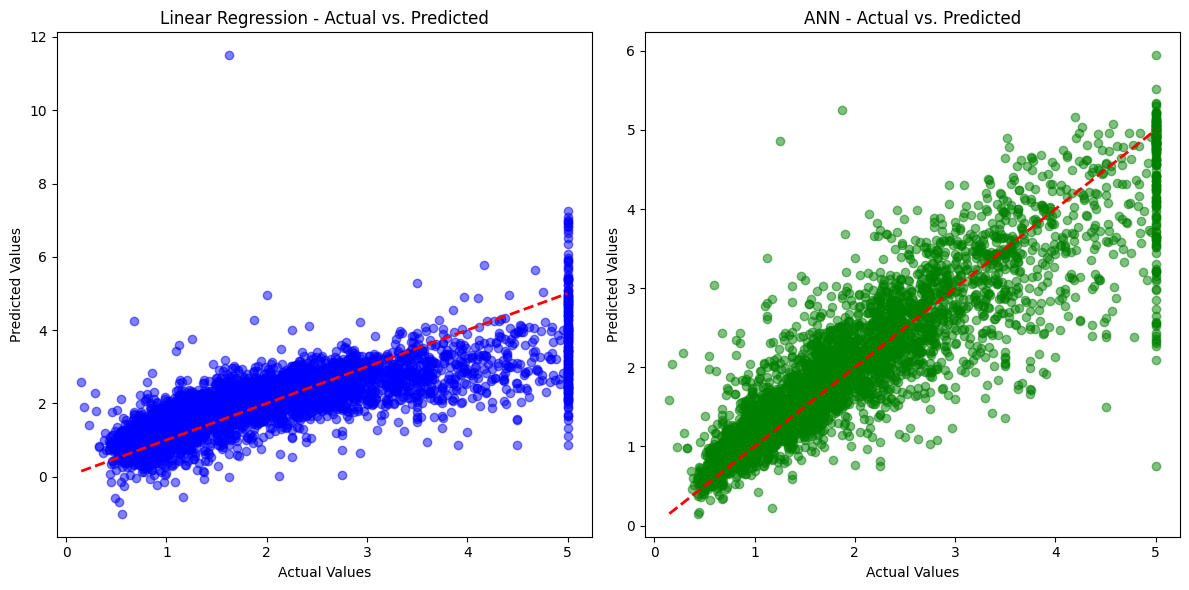

In [5]:
# Plotting
plt.figure(figsize=(12, 6))

# Linear Regression Results
plt.subplot(1, 2, 1)
plt.scatter(y_test, linear_reg_predictions, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('Linear Regression - Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

# ANN Results
plt.subplot(1, 2, 2)
plt.scatter(y_test, ann_predictions, color='green', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)
plt.title('ANN - Actual vs. Predicted')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

plt.tight_layout()
plt.show()

## Linear Regression:

**Strengths:**
- Simple and interpretable.
- Works well when the relationship between features and target variable is approximately linear.


**Weaknesses:**
- Limited in capturing complex, non-linear relationships.
- May underperform when there are interactions or non-linear patterns in the data.
- R2 score is lower, MSE is high


## Artificial Neural Network (ANN):

**Strengths:**
- Capable of learning complex, non-linear relationships.
- Can automatically capture hierarchical features through hidden layers.
- R2 score is higher, MSE is less

**Weaknesses:**
- Prone to overfitting, especially on smaller datasets.
- Requires careful tuning of hyperparameters, such as the number of layers and neurons, to avoid overfitting or underfitting.
